<a href="https://colab.research.google.com/github/AshishShinde03/ML/blob/main/OBV_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm

In [208]:
ticker = 'panw'
start = '1926-07-01'
end = '2023-01-31'

In [209]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [210]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [211]:
df_pawn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [217]:
ff_data = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/ML/main/F-F_Research_Data_Factors_daily.CSV')

In [218]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017
25415,20230126,1.08,-0.58,0.01,0.017
25416,20230127,0.36,0.62,-1.16,0.017
25417,20230130,-1.38,-0.10,0.72,0.017


In [219]:
ff_data['Date1'] = ff_data['SrNo'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))

In [220]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08
...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30


In [221]:
ff_data['Date'] = pd.to_datetime(ff_data['SrNo'], format='%Y%m%d')

In [222]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1,Date
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08,1926-07-08
...,...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30,2023-01-30


In [223]:
ff_data = ff_data.set_index('Date')

In [224]:
start_date = pd.to_datetime('2012-07-20')
end_date = pd.to_datetime('2023-01-30')
ff_data = ff_data[(ff_data.index >= start_date) & (ff_data.index <= end_date)]

In [225]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
Date,,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000,2012-07-20
2012-07-23,20120723,-1.02,-0.68,0.19,0.000,2012-07-23
2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2012-07-24
2012-07-25,20120725,-0.01,0.27,0.00,0.000,2012-07-25
2012-07-26,20120726,1.53,-0.89,0.34,0.000,2012-07-26
...,...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2023-01-24
2023-01-25,20230125,0.00,-0.04,0.65,0.017,2023-01-25
2023-01-26,20230126,1.08,-0.58,0.01,0.017,2023-01-26


In [227]:
ff_data = ff_data.drop([ 'Date1'], axis=1)

In [228]:
ff_data


,SrNo,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000
2012-07-23,20120723,-1.02,-0.68,0.19,0.000
2012-07-24,20120724,-0.99,-0.57,0.30,0.000
2012-07-25,20120725,-0.01,0.27,0.00,0.000
2012-07-26,20120726,1.53,-0.89,0.34,0.000
...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017
2023-01-25,20230125,0.00,-0.04,0.65,0.017
2023-01-26,20230126,1.08,-0.58,0.01,0.017


In [229]:
merged_df = pd.merge(ff_data, df_pawn, on='Date', how='inner')

In [230]:
merged_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [231]:
ADS_DF = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/DataSet_MLFin/main/ADS.csv')

In [232]:
ADS_DF

,Date,ADS_Index
0,1960:03:01,-0.580320
1,1960:03:02,-0.627497
2,1960:03:03,-0.671697
3,1960:03:04,-0.712936
4,1960:03:05,-0.751225
...,...,...
23030,2023:03:21,0.028513
23031,2023:03:22,0.027573
23032,2023:03:23,0.026756
23033,2023:03:24,0.026063


In [233]:
ADS_DF['Date'] = pd.to_datetime(ADS_DF['Date'], format='%Y:%m:%d')

In [179]:
ADS_DF

,Date,ADS_Index
0,1960-03-01,-0.580320
1,1960-03-02,-0.627497
2,1960-03-03,-0.671697
3,1960-03-04,-0.712936
4,1960-03-05,-0.751225
...,...,...
23030,2023-03-21,0.028513
23031,2023-03-22,0.027573
23032,2023-03-23,0.026756
23033,2023-03-24,0.026063


In [180]:
ADS_DF =  ADS_DF.set_index('Date')

In [181]:
ADS_DF

,ADS_Index
Date,
1960-03-01,-0.580320
1960-03-02,-0.627497
1960-03-03,-0.671697
1960-03-04,-0.712936
1960-03-05,-0.751225
...,...
2023-03-21,0.028513
2023-03-22,0.027573
2023-03-23,0.026756


In [182]:
startdate = pd.to_datetime('2012-07-20')
enddate = pd.to_datetime('2023-01-30')
ADS_DF = ADS_DF[(ADS_DF.index >= startdate) & (ADS_DF.index <= enddate)]

In [183]:
ADS_DF

,ADS_Index
Date,
2012-07-20,-0.382497
2012-07-21,-0.387390
2012-07-22,-0.393668
2012-07-23,-0.400192
2012-07-24,-0.406964
...,...
2023-01-26,0.109483
2023-01-27,0.103680
2023-01-28,0.096581


In [184]:
merged_ADS_df = pd.merge(merged_df, ADS_DF, on='Date', how='inner')

In [185]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,NaN,-0.382497
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,17.709999,-0.400192
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680


In [252]:
merged_OBV_df = merged_df

In [253]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


## 𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑂𝐵𝑉𝑡 ― 1 + 𝜀𝑡

In [236]:
merged_OBV_df = merged_ADF_df.iloc[1:]

In [237]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index,OBV
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964,-214800
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985,1584300
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259,2867700
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,19.959999,-0.428787,2407500
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,19.000000,-0.453149,1578300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206,622664000
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991,629155500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483,635938000
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680,640109700


In [238]:
# Calculate the On-Balance Volume (OBV) indicator
merged_OBV_df['OBV'] = np.where(merged_OBV_df['Close'] > merged_OBV_df['Close'].shift(1), merged_OBV_df['Volume'], 
                       np.where(merged_OBV_df['Close'] < merged_OBV_df['Close'].shift(1), -merged_OBV_df['Volume'], 0)).cumsum()

<ipython-input-238-6400f99d64aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [239]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index,OBV
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964,0
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259,3082500
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,19.959999,-0.428787,2622300
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,19.000000,-0.453149,1793100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206,622878800
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991,629370300
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483,636152800
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680,640324500


In [240]:
merged_OBV_df = merged_ADF_df.iloc[1:]

In [241]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index,OBV
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964,-214800
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985,1584300
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259,2867700
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,19.959999,-0.428787,2407500
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,19.000000,-0.453149,1578300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206,622664000
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991,629155500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483,635938000
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680,640109700


In [242]:
# Define the dependent and independent variables
y = merged_OBV_df['Close']
X = merged_OBV_df[['Close', 'OBV']].shift(1).dropna()

In [243]:
# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y[1:], X)
results = model.fit()

In [244]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.586e+05
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:09:15   Log-Likelihood:                -5766.4
No. Observations:                2646   AIC:                         1.154e+04
Df Residuals:                    2643   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0521      0.077      0.674      0.5

In [245]:
# Calculate the lagged values
merged_OBV_df['Yt-1'] = merged_OBV_df['Adj Close'].shift(1)
merged_OBV_df['OBVt-1'] = merged_OBV_df['OBV'].shift(1)

<ipython-input-245-32fa7a0da147>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-245-32fa7a0da147>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [246]:
Yt = 0.0538 + 0.9960*merged_OBV_df['Adj Close'].shift(1) + 8.36e-10*merged_OBV_df['OBV'].shift(1)

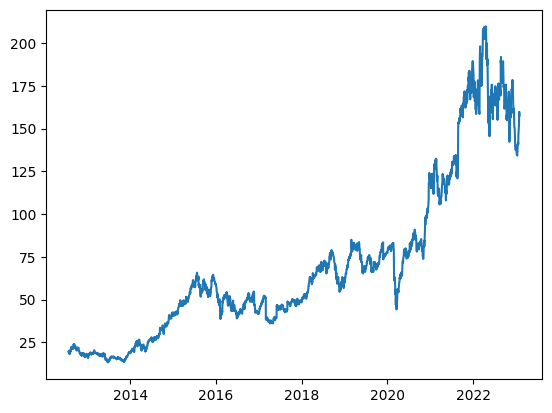

In [247]:
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

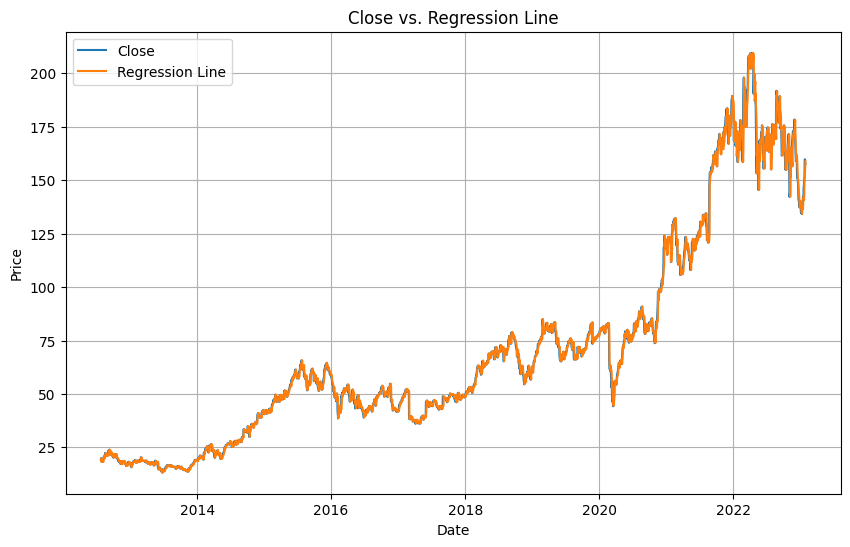

In [248]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

# Plot the regression line
y_pred = results.predict(X)
plt.plot(merged_OBV_df['Date'].iloc[2:], y_pred[:-1], label='Regression Line')

plt.title('Close vs. Regression Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(loc='upper left')

plt.show()


In [249]:
import plotly.graph_objects as go

# Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[1:], y=merged_OBV_df['Close'].iloc[1:], mode='lines', name='Close'))

# Plot the regression line
y_pred = results.predict(X)
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[2:], y=y_pred[:-1], mode='lines', name='Regression Line'))

fig.update_layout(title='Close vs. Regression Line', xaxis_title='Date', yaxis_title='Price', legend=dict(x=0.7, y=0.9))
fig.show()



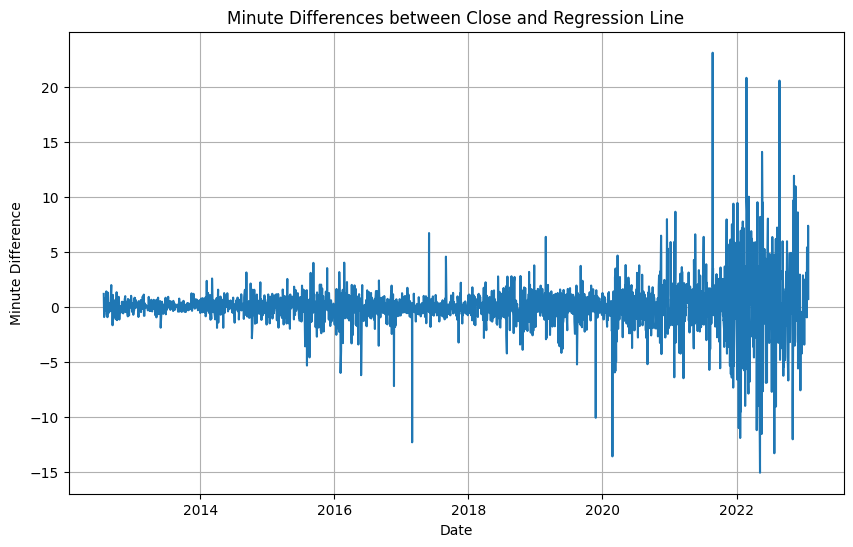

In [250]:
# Get the predicted values of Y from the model
y_pred = results.predict(X)

# Calculate the minute differences between the Close and the Regression Line
minute_diff = merged_OBV_df['Close'].iloc[1:] - y_pred[:-1]

# Plot the minute differences
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], minute_diff)
plt.title('Minute Differences between Close and Regression Line')
plt.xlabel('Date')
plt.ylabel('Minute Difference')
plt.grid()

plt.show()


In [251]:
# Calculate residuals
residuals = merged_OBV_df['Close'].iloc[1:] - y_pred

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 4.575303868017767
RMSE: 2.1389959953253226


# Augmented AR(1) using ADS Index: 𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝐴𝐷𝑆𝑡 ― 1 + 𝜀𝑡

In [186]:
merged_ADS_df['Y_lag'] = merged_ADS_df['Adj Close'].shift(1)
merged_ADS_df['ADS_lag'] = merged_ADS_df['ADS_Index'].shift(1)
merged_ADS_df['Y_diff'] = merged_ADS_df['Adj Close'].diff()
merged_ADS_df['ADS_diff'] = merged_ADS_df['ADS_Index'].diff()


In [187]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index,ADS_lag,Y_diff,ADS_diff
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,NaN,-0.382497,NaN,NaN,NaN
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,17.709999,-0.400192,-0.382497,-0.539999,-0.017695
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964,-0.400192,1.330000,-0.006772
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985,-0.406964,1.150000,-0.007021
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259,-0.413985,0.309999,-0.007274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206,0.119129,1.800003,-0.001923
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991,0.117206,0.639999,-0.003215
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483,0.113991,7.330002,-0.004508
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680,0.109483,0.669998,-0.005803


In [188]:
merged_ADS_df = merged_ADS_df.iloc[1:]


In [189]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Y_lag,ADS_Index,ADS_lag,Y_diff,ADS_diff
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,17.709999,-0.400192,-0.382497,-0.539999,-0.017695
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,17.170000,-0.406964,-0.400192,1.330000,-0.006772
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,18.500000,-0.413985,-0.406964,1.150000,-0.007021
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,19.650000,-0.421259,-0.413985,0.309999,-0.007274
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,19.959999,-0.428787,-0.421259,-0.959999,-0.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,149.339996,0.117206,0.119129,1.800003,-0.001923
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,151.139999,0.113991,0.117206,0.639999,-0.003215
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,151.779999,0.109483,0.113991,7.330002,-0.004508
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,159.110001,0.103680,0.109483,0.669998,-0.005803


In [190]:
X = sm.add_constant(X)

In [192]:
print(Y.index)
print(X.index)


Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648],
           dtype='int64', length=2648)
Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648],
           dtype='int64', length=2647)


In [254]:
model = sm.OLS(Y, X)
results = model.fit()

ValueError: ignored

In [255]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.586e+05
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:30   Log-Likelihood:                -5766.4
No. Observations:                2646   AIC:                         1.154e+04
Df Residuals:                    2643   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0521      0.077      0.674      0.5

SyntaxError: ignored